In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Callout :
1. This noteook features popular clustering algoritms and their implementations in python
2. Thes clusterings have been performed on simulated data for benchmarking purposes

# Importing necessary libraries

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Creating patterned data for clustering

## Concentric circle data

<AxesSubplot:>

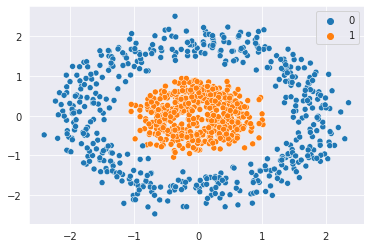

In [3]:
# Generate sample data
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.12)

#------------------------------------------------------------------------
ads_arr = StandardScaler().fit_transform(X)

sns.set_style('darkgrid')
sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=y)

# K-Means Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

#------------------------------------------------------------------------------
kmeans = KMeans(n_clusters=6,
                n_init=10,
                max_iter=50,
                tol=1e-4,
                random_state=50)
kmeans.fit(ads_arr)

#------------------------------------------------------------------------------
kmeans_labels = kmeans.labels_
print('Cluster Centers :\n',kmeans.cluster_centers_,'\n')
print('Final Inertia Value :',kmeans.inertia_,'\n')
print('Total iterations run before hitting tol value :',kmeans.n_iter_,'\n')

Cluster Centers :
 [[ 0.01171831  0.02290311]
 [ 0.99095154 -1.38335741]
 [-1.08910497 -1.26642824]
 [ 1.64703587  0.46381721]
 [-1.53937968  0.73514311]
 [ 0.20177728  1.74038696]] 

Final Inertia Value : 432.87333088023433 

Total iterations run before hitting tol value : 13 



### Run Elbow analysis on inertia and silhouette scores for best k

<AxesSubplot:title={'center':'Mean Silhouette Value Curve Mean_Sil_Value-vs-k'}>

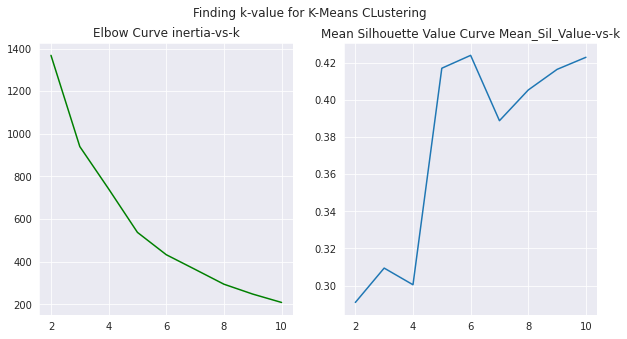

In [5]:
k_list = [2,3,4,5,6,7,8,9,10]
inertia_list = []
silhouette_list = []
silhouette_samples_list = []

#--------------------------------------------------------------------------------------------------------------
for k_ in k_list:

    kmeans = KMeans(n_clusters=k_,
                    n_init=10,
                    max_iter=50,
                    tol=1e-4,
                    random_state=50)
    kmeans.fit(ads_arr)
    
    #---------------------------------------------------------------------------
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X=ads_arr,labels=kmeans.labels_))
    
#--------------------------------------------------------------------------------------------------------------    
sns.set_style('darkgrid')

#-----------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))

#-----------------------------------------------------------------------
fig.suptitle('Finding k-value for K-Means CLustering')
axes[0].set_title('Elbow Curve inertia-vs-k')
axes[1].set_title('Mean Silhouette Value Curve Mean_Sil_Value-vs-k')

#-----------------------------------------------------------------------
sns.lineplot(ax=axes[0],x=k_list, y=inertia_list,color='g')
sns.lineplot(ax=axes[1],x=k_list,y=silhouette_list)

#### Insights : 
1. Suggesting k=6 from inertia curve as well as Silhouette curve, but we know that the distribution has only 2 clusters
2. Hence, it is clear that k-means will fail to capture the patterns in the non-linear clusters

[Text(0.5, 1.0, 'Kmeans Clusters')]

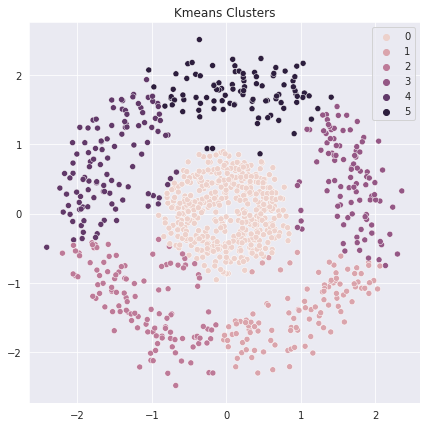

In [6]:
#Following the above insight and plotting the clusters with k=6 anyway
fig, ax = plt.subplots(figsize=(7,7))
ax_kmeans = sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=kmeans_labels)
ax_kmeans.set(title='Kmeans Clusters')

### Insights : Since Kmeans method is a parametric one, it assumes the clusters to be equi-density and spherical and shape. Hence it performs poorly on the above dataset

# Hierarchial Clustering (Agglomerative Clustering)

In [7]:
from sklearn.cluster import AgglomerativeClustering

#-------------------------------------------------------------------------------
agg = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward') #compute_distances=True after installing sklearn version 0.24 or higher
agg.fit(ads_arr)
agg_labels = agg.labels_

[Text(0.5, 1.0, 'Agglomerative Clusters')]

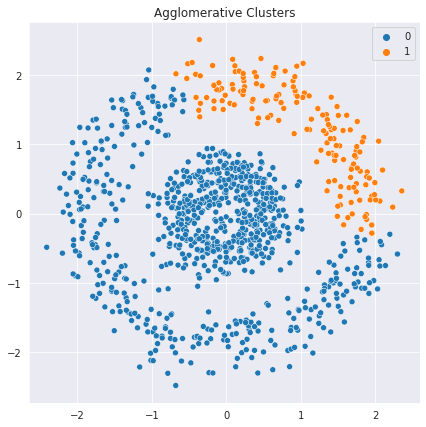

In [8]:
#Plotting the labels
fig, ax = plt.subplots(figsize=(7,7))
ax_aggl = sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=agg_labels)
ax_aggl.set(title='Agglomerative Clusters')

## Using sillouette scores to find the best number of clusters found by agglomerative clustering 

<AxesSubplot:title={'center':'Mean Silhouette Value Curve Mean_Sil_Value-vs-k'}>

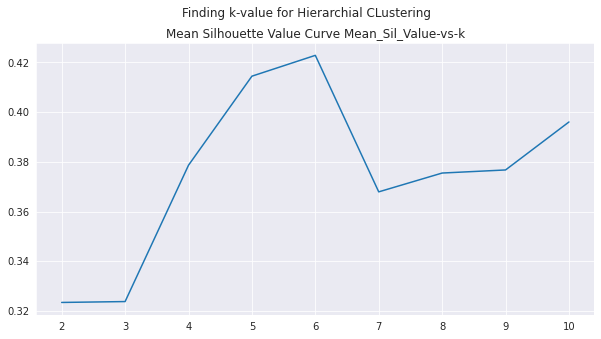

In [9]:
k_list = [2,3,4,5,6,7,8,9,10]
inertia_list = []
silhouette_list = []
silhouette_samples_list = []

#--------------------------------------------------------------------------------------------------------------
for k_ in k_list:

    agg = AgglomerativeClustering(n_clusters=k_,affinity='euclidean',linkage='ward')
    agg.fit(ads_arr)
    
    #---------------------------------------------------------------------------
    silhouette_list.append(silhouette_score(X=ads_arr,labels=agg.labels_))
    
#--------------------------------------------------------------------------------------------------------------    
sns.set_style('darkgrid')

#-----------------------------------------------------------------------
fig, axes = plt.subplots(1, 1, sharex=False, figsize=(10,5))

#-----------------------------------------------------------------------
fig.suptitle('Finding k-value for Hierarchial CLustering')
axes.set_title('Mean Silhouette Value Curve Mean_Sil_Value-vs-k')

#-----------------------------------------------------------------------
sns.lineplot(x=k_list,y=silhouette_list)

#### Suggesting a k value of 6, which is incorrect

# DBSCAN (Density Based Spatial Clustering of Applications with Noise) - Phhewww!

In [10]:
from sklearn.cluster import DBSCAN

#-----------------------------------------------------------------------------
dbscan = DBSCAN(eps=0.5,min_samples=5,metric='euclidean',n_jobs=-1)
dbscan.fit(ads_arr)
dbscan_labels = dbscan.labels_

<AxesSubplot:>

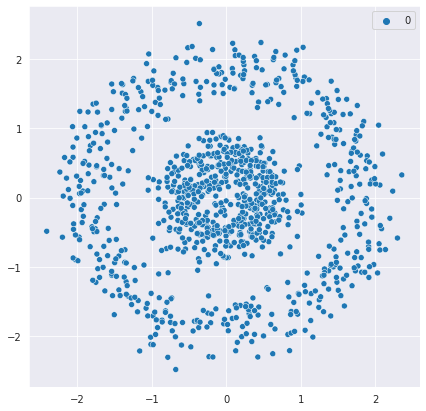

In [11]:
#Plotting the labels
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=dbscan_labels)

#### Insights:
1. All the points are getting mapped to one cluster, i.e the size of eps is too large. It needs to be tuned intuitively

## Tuning the value of 'eps' in DBSCAN through elbow curve of nearest neighbour density 
1. For each point, calculate the 'k' nearest neighbors and the largest radius possible to accomodate the k nearest neighbours
2. Find the elbow of the grap by plotting the above against all the point numbers

In [12]:
!pip install kneed 
from kneed import KneeLocator

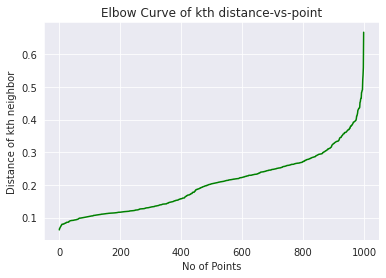

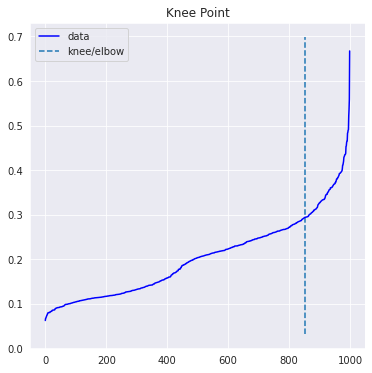

In [13]:
from sklearn.neighbors import NearestNeighbors #Nearest Neighbor Calculator

nbrs = NearestNeighbors(n_neighbors=11,algorithm='auto',metric='minkowski',p=2,n_jobs=-1).fit(ads_arr) #11 as it counts for self as well (0 distance)
distances, indices = nbrs.kneighbors(ads_arr)


#-----------------------------------------------------------------------------------------------------
distances = np.sort(distances[:,-1], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

#-----------------------------------------------------------------------------------------------------
ax = sns.lineplot(x=range(0,len(ads_arr)),y=distances,color='g')
ax.set(xlabel='No of Points',ylabel='Distance of kth neighbor',title='Elbow Curve of kth distance-vs-point')
knee.plot_knee()

#### Running with eps valu 0.3 and min_points as 10 (excluding itself) as derived from above

[Text(0.5, 1.0, 'DBSCAN clusters')]

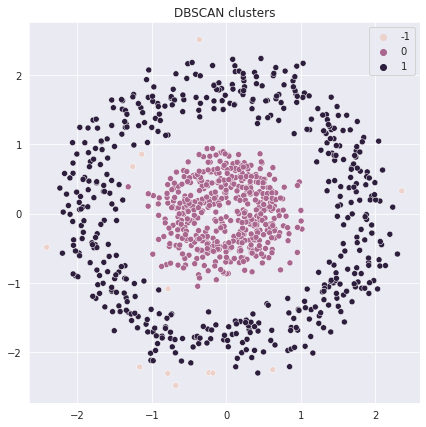

In [14]:
dbscan = DBSCAN(eps=0.3,min_samples=10,metric='euclidean',n_jobs=-1)
dbscan.fit(ads_arr)
dbscan_labels = dbscan.labels_

#Plotting labels
fig, ax = plt.subplots(figsize=(7,7))
ax_dbscan = sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=dbscan_labels)
ax_dbscan.set(title='DBSCAN clusters')

### Insights : DBSCAN is able to appropriately capture the clusters while demarcating noisy points which is necessary since not every point belongs to a cluster in real life examples

# HDBSCAN (Hierarchial DBSCAN)

### Package Installation

In [15]:
conda install -c conda-forge hdbscan #Due to volatile cluster we have to install everytime

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - hdbscan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    hdbscan-0.8.27             |   py37h902c9e0_0         682 KB  conda-forge
    ------------------------------------------------------------
                                           

In [16]:
import hdbscan

#------------------------------------
HDBSCAN = hdbscan.HDBSCAN(min_samples=5)
HDBSCAN.fit(ads_arr)
hdscan_labels = HDBSCAN.labels_

### Plotting HDBSCAN Labels

[Text(0.5, 1.0, 'HDBSCAN Clusters')]

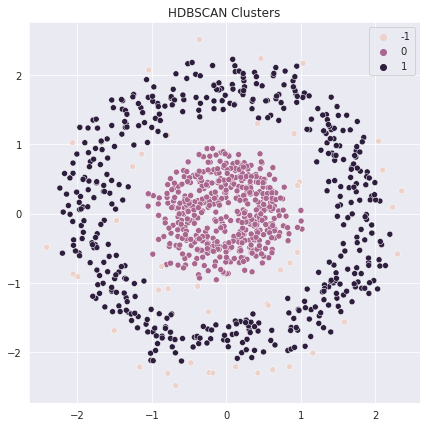

In [17]:
#Plotting the labels
fig, ax = plt.subplots(figsize=(7,7))
ax_hdbscan = sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=hdscan_labels)
ax_hdbscan.set(title='HDBSCAN Clusters')

### Hierarchy Tree of DBSCAN

<AxesSubplot:ylabel='$\\lambda$ value'>

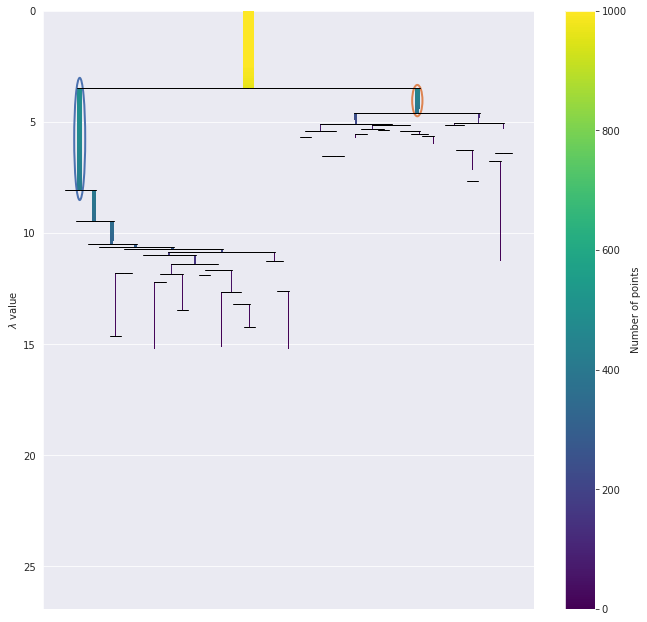

In [18]:
fig, ax = plt.subplots(figsize=(11,11))
HDBSCAN.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

### Probability Plot (Shows the probability of membership of a point in its cluster)

<AxesSubplot:>

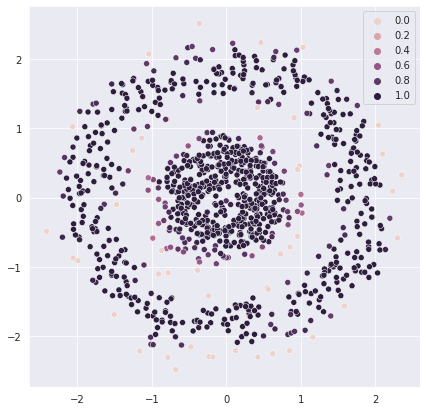

In [19]:
#Following the above insight and plotting the clusters with the proabbaility of membership within cluster
cluster_proba_hdbscan = HDBSCAN.probabilities_

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=ads_arr[:,0],y=ads_arr[:,1],hue=cluster_proba_hdbscan)

# END